

# Titanic Dataset Project

## Introduction
This project utilises the titanic dataset.
- https://www.kaggle.com/c/titanic/data

It analyses the data and asks questions such as:

- Does the persons gender mean they more likely to survive?
- Does the class of the person's ticket mean they are more likely to survive?
- Does a persons age mean they are more likely to survive?
- Does the cost of the ticket mean they are more likely to survive


In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


/home/riched/anaconda2/envs/dato-env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#load in the data and check its contents
df = pd.read_csv('titanic_data.csv',header=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#get info on the data, such as missing data etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 1. Clean up the data

Initially the dataset was studied and after reading several references,shown at the bottom of the page, 
the dataset was cleaned up and information deemed to be unimportant erased and or edited.  

In [4]:
#passenger id, name and ticket can be removed
df = df.drop(['PassengerId','Name','Ticket'],axis=1)
#majority of cabin entries are nan and dont believe important to outcome
df = df.drop(['Cabin'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [5]:
# check number of nans in dataset
df.apply(lambda x: sum(x.isnull()),axis=0)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [6]:
#We can see we have 2 entries under embarked as nan, where are they?
df[df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [7]:
print (df['Embarked'] == 'S').sum()
print (df['Embarked'] == 'C').sum()
print (df['Embarked'] == 'Q').sum()

#We can see that S - Southampton is most common value
#therefore fill in the two Embarked entries with the most common "S" - Southampton
df["Embarked"] = df["Embarked"].fillna("S")


644
168
77


Filled in the missing embarked data with the most popular 'S'.  Only 2 are missing so do not believe has significant impact of the data analysis

In [8]:
#sort gender into male, female and child
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex

#call function and process data along columns, then remove 'Sex' column
df['Person'] = df[['Age','Sex']].apply(get_person,axis=1)
df.drop(['Sex'],axis=1,inplace = True)


Using the function above Have split genders into male, female and child

/home/riched/anaconda2/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


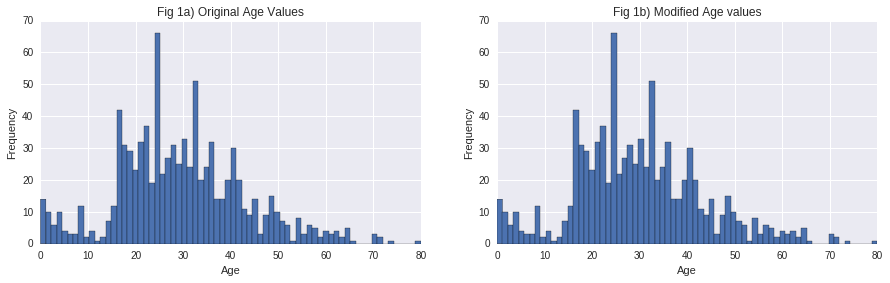

In [54]:
#age has 177 missing data values, calculate a mean value and insert
average_age = df['Age'].mean()
std_age = df['Age'].std()
count_age = df['Age'].isnull().sum()


fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Fig 1a) Original Age Values')
axis2.set_title('Fig 1b) Modified Age values')
axis1.set_xlabel('Age')
axis2.set_xlabel('Age')
axis1.set_ylabel('Frequency')
axis2.set_ylabel('Frequency')

#original age data
df['Age'].dropna().astype(int).hist(bins=70,ax=axis1)

#generate rand numbers between (mean - std) & (mean = std) of length count_age
random_1 = np.random.randint(average_age - std_age, average_age + std_age,size = count_age)
#replace nan values with calculated random values
df['Age'][np.isnan(df['Age'])] = random_1
#float not needed, convert to integer
df['Age'] = df['Age'].astype(int)

df['Age'].hist(bins=70,ax=axis2)


 In Figure 1 we can see from the graphs the result of adding 177 random age values around the mean plus or minus a standard deviation.  We can see that there is more data around the mean value as expected.  Adding these values would have affected the results for example if many people in the original missing age values were at the outliers of the age distribution for example many elderly people.  A larger graph with the modified age values is shown as Figure 2 below.  

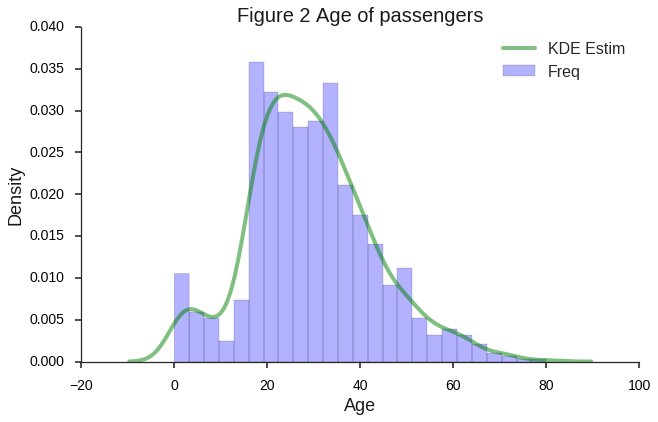

In [10]:
sns.set_context('poster')
sns.set_style('ticks')

g = sns.distplot(df['Age'],
                 kde_kws={'color':'g','lw':4,'label':'KDE Estim','alpha':0.5},   
                 hist_kws={'color':'b','label':'Freq','alpha':0.3}                
                )
sns.despine()
g.figure.set_size_inches(10,6)
g.axes.set_title('Figure 2 Age of passengers',fontsize=20,color='black',alpha=0.9)
g.set_xlabel('Age',size = 18,color='black',alpha = 0.9)
g.set_ylabel('Density',size=18,color='black',alpha=0.9)
g.tick_params(labelsize=14,labelcolor='black')


From the Figure 2 above we can see a normal like distribution with the mean passenger age around 30.

## Discussion
The dataset was researched and cleaned.  It was found that 177 age values were missing from the 891 entries.  The mean age of the included age values were found and then random values were found within one standard deviation of the mean.  These values were then used to replace the missing values.  This would affect the results if the missing values were outliers of a normal distribution, in this case for example many very old or very young people.  Given the normal age distribution of the remaining passengers this method would significantly affect the results    

## 2. Fares

In this section the value of the fares were analysed with regard to chances of surviving the sinking of the Titanic.

In [13]:
df.groupby('Pclass').mean()
#We can see that a much higher percentage survived in Pclass1.  We can also see that Pclass does correspond to cost
#of the fare, as as Pclass 1 has a much higher Fare price.


,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,37.134259,0.416667,0.356481,84.154687
2,0.472826,29.793478,0.402174,0.380435,20.662183
3,0.242363,26.331976,0.615071,0.393075,13.675550


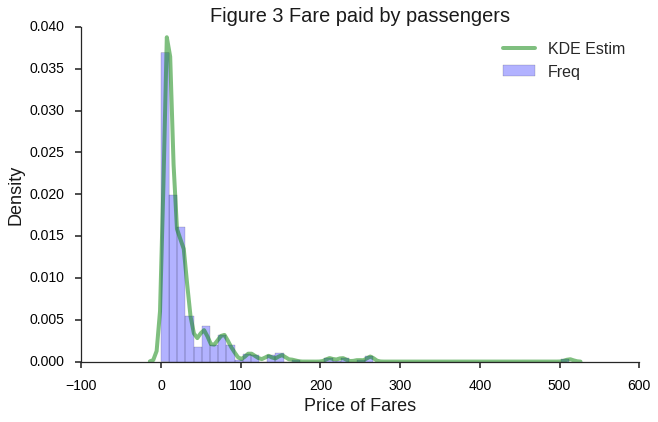

In [11]:
#Fares who survived according to cost of ticket

#generate two pandas series, containing fare cost and survived info
fare_not_survived = df['Fare'][df['Survived']==0]
fare_survived = df['Fare'][df['Survived']==1]

#generate data frames for plotting
average_fare = pd.DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(),fare_survived.std()])

sns.set_context('poster')
sns.set_style('ticks')

#plt.xlabel("Fare");
#plt.title("Fare paid by passengers");
#df['Fare'].plot(kind='hist',figsize=(15,5),bins=100,xlim=(0,300))
g = sns.distplot(df['Fare'],
                 kde_kws={'color':'g','lw':4,'label':'KDE Estim','alpha':0.5},   
                 hist_kws={'color':'b','label':'Freq','alpha':0.3}                
                )
sns.despine()
g.figure.set_size_inches(10,6)
g.axes.set_title('Figure 3 Fare paid by passengers',fontsize=20,color='black',alpha=0.9)
g.set_xlabel('Price of Fares',size = 18,color='black',alpha = 0.9)
g.set_ylabel('Density',size=18,color='black',alpha=0.9)
g.tick_params(labelsize=14,labelcolor='black')

#We can see that the great majority of people paid low fares and were therefore lower class passengers.  
#The average price paid v survival plot shows that you were more likely to survive the higher the fare you paid.


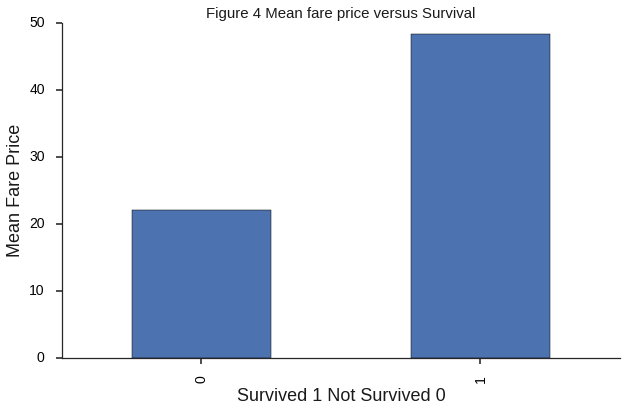

In [12]:
g2 = average_fare.plot(kind='bar',legend = False)
sns.despine()
g2.figure.set_size_inches(10,6)
g2.axes.set_title('Figure 4 Mean fare price versus Survival',fontsize=15,color='black',alpha=0.9)
g2.set_xlabel('Survived 1 Not Survived 0',size = 18,color='black',alpha = 0.9)
g2.set_ylabel('Mean Fare Price',size=18,color='black',alpha=0.9)
g2.tick_params(labelsize=14,labelcolor='black')

#We can see that the higher the ticket price, the more likely to survive

Figures 3 and 4 above show that the great majority of people paid low fares and were therefore lower class passengers.  They also demonstrate that you were more likely to survive the higher the fare you paid.

## Discussion
It was found that the chances of survival increased greatly with fare cost.  Even though the great majority of people paid low cost fares, the few that paid more expensive fare were more likely to survive 



## 3. Pclass

The class of tickets bought by the passengers is analysed to see the affect it had on surviving the sinking.


In [15]:
person_class = df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()
person_class.head()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


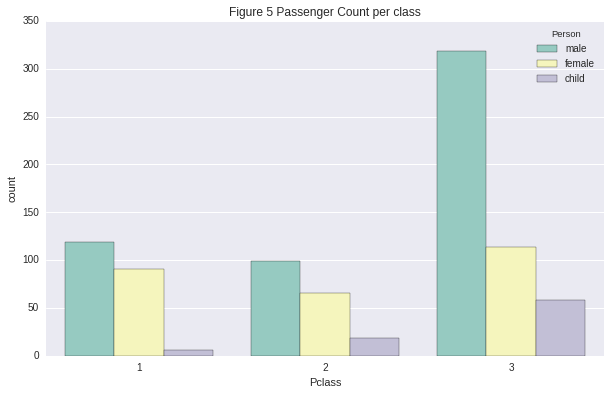

In [26]:

g5 = sns.countplot(x='Pclass',hue = 'Person',data=df,palette="Set3")
g5.set(title = 'Figure 5 Passenger Count per class')
g5.figure.set_size_inches(10,6)

Figure 1 shows that the biggest category were third class male passengers

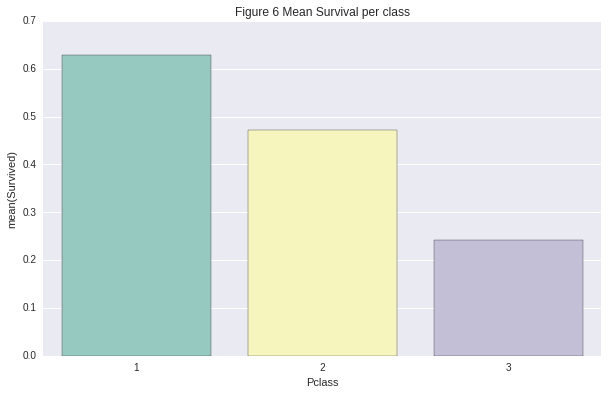

In [27]:
g6 = sns.barplot(x='Pclass',y='Survived',data = person_class,palette="Set3")
g6.set(title = 'Figure 6 Mean Survival per class')
g6.figure.set_size_inches(10,6)

Figure 6 shows that thirds class passengers were unlikely to survive the sinking

In [20]:
#Third class males had very low survival rates 12% but first class males also had a low survival rate 35% - see tables below

out2 = df[df.Pclass==1]
out3 = out2[out2.Person=='male']
out3.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,119.000000,119.0,119.000000,119.000000,119.000000,119.000000
mean,0.352941,1.0,40.336134,0.302521,0.235294,65.951086
std,0.479905,0.0,13.818605,0.545469,0.606545,77.969681
min,0.000000,1.0,17.000000,0.000000,0.000000,0.000000
25%,0.000000,1.0,28.500000,0.000000,0.000000,27.720800
50%,0.000000,1.0,38.000000,0.000000,0.000000,39.600000
75%,1.000000,1.0,49.000000,1.000000,0.000000,77.008350
max,1.000000,1.0,80.000000,3.000000,4.000000,512.329200


In [19]:
out2 = df[df.Pclass==3]
out3 = out2[out2.Person=='male']
out3.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,319.000000,319.0,319.000000,319.000000,319.000000,319.000000
mean,0.119122,3.0,29.172414,0.294671,0.128527,11.340213
std,0.324441,0.0,9.843990,1.009859,0.525244,10.661605
min,0.000000,3.0,15.000000,0.000000,0.000000,0.000000
25%,0.000000,3.0,21.000000,0.000000,0.000000,7.750000
50%,0.000000,3.0,28.000000,0.000000,0.000000,7.895800
75%,0.000000,3.0,36.000000,0.000000,0.000000,8.662500
max,1.000000,3.0,74.000000,8.000000,5.000000,69.550000


## Discussion 
There were many more passengers of lower class, we can see that the higher the class the better the survival rate.  For example a male with a first class ticket had a mean survival rate of 35% but third class male had a mean survival rate of only 11%.  

## 3. Age

The age of the passenegers was analysed to see if there is there a relationship between survival and age.

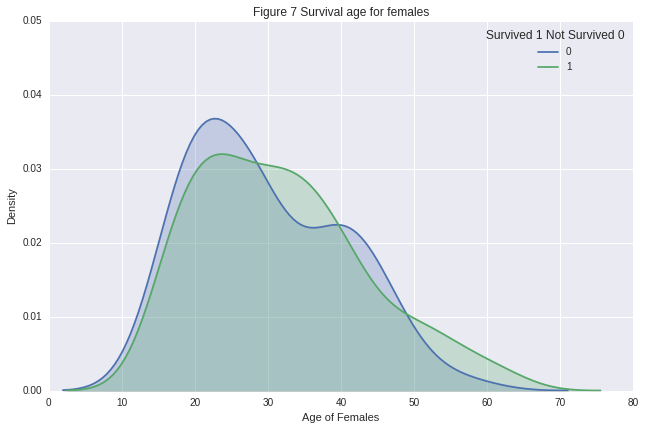

In [42]:
#Age survival for Females
fm_df = df[df.Person == 'female']
#Plot 
g.figure.set_size_inches(10,6)
g3 = sns.FacetGrid(fm_df,hue="Survived",size = 6,aspect=1.5)

#map a kernel density plot with data Age
g3.map(sns.kdeplot,'Age',shade = True)
#set axis limits
g3.set(xlim=(0,80))
g3.set(ylim=(0,0.05))
#g3.add_legend()
plt.legend(title="Survived 1 Not Survived 0",loc='upper right')
sns.despine()
g3.set(xlabel = 'Age of Females',ylabel = 'Density')
g3.set(title = 'Figure 7 Survival age for females')


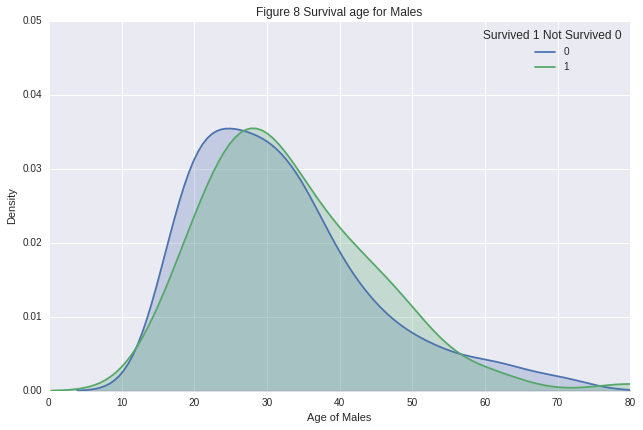

In [43]:
#person survival - male
m_df = df[df.Person == 'male']
g.figure.set_size_inches(10,6)
g4 = sns.FacetGrid(m_df,hue="Survived",size = 6,aspect=1.5)

#map a kernel density plot with data Age
g4.map(sns.kdeplot,'Age',shade = True)
#set axis limits
g4.set(xlim=(0,80))
g4.set(ylim=(0,0.05))
plt.legend(title="Survived 1 Not Survived 0",loc='upper right')

sns.despine()
g4.set(xlabel = 'Age of Males',ylabel = 'Density')
g4.set(title = 'Figure 8 Survival age for Males')

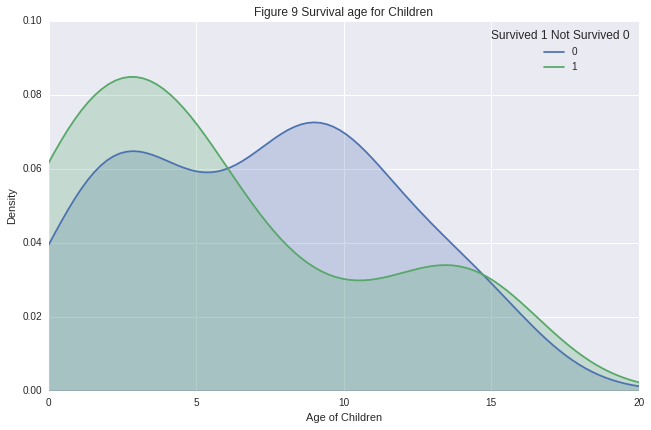

In [44]:
#person survival - child
c_df = df[df.Person == 'child']

g4 = sns.FacetGrid(c_df,hue="Survived",size = 6,aspect=1.5)
g.figure.set_size_inches(10,6)
#map a kernel density plot with data Age
g4.map(sns.kdeplot,'Age',shade = True)
#set axis limits
g4.set(xlim=(0,20))
g4.set(ylim=(0,0.1))
plt.legend(title="Survived 1 Not Survived 0",loc='upper right')

sns.despine()
g4.set(xlabel = 'Age of Children',ylabel = 'Density')
g4.set(title = 'Figure 9 Survival age for Children')

#small children are more likely to survive

## Discussion
Density plots for the age of the passengers had been produced.  There was not a significant difference between survived and not survived.  This indicates that age of an adult passenger did not have a significant affect on survival.  Children under the age of around 6 were the most likely children to survive.

# 4. Gender

The gender of the passengers was analyses and the affect on survival evaluated.

In [23]:
person_df = df[['Person','Survived']].groupby(['Person'],as_index=False).mean()
person_df.head()

,Person,Survived
0,child,0.590361
1,female,0.756458
2,male,0.163873


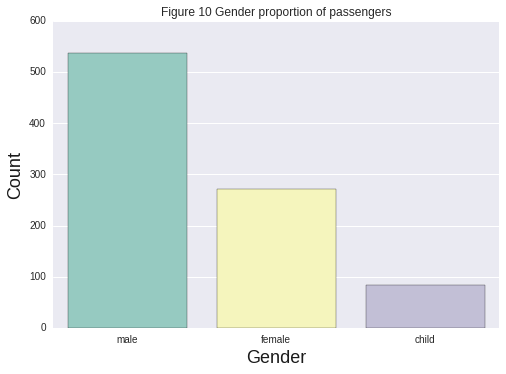

In [35]:
sns.set(style="darkgrid")
g5 = sns.countplot(x='Person',data=df,palette="Set3")
g5.set(xlabel = 'Age of Children',ylabel = 'Density')
g5.set(title = 'Figure 10 Gender proportion of passengers')
g.figure.set_size_inches(10,6)
g5.set_xlabel('Gender',size = 18,color='black',alpha = 0.9)
g5.set_ylabel('Count',size=18,color='black',alpha=0.9)

#### Figure 10 shows that the majority of passenegers were male

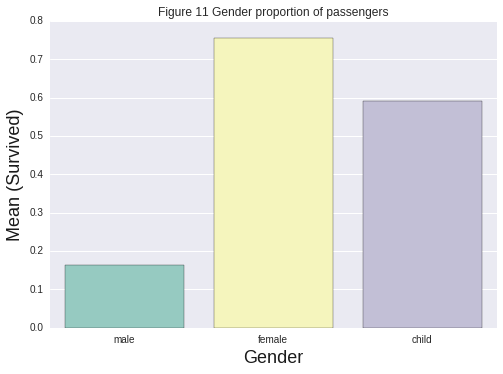

In [25]:

g6=sns.barplot(x='Person',y='Survived',data = person_df,order = ['male','female','child'],palette="Set3")
g6.set(xlabel = 'Age of Children',ylabel = 'Density')
g6.set(title = 'Figure 11 Gender proportion of passengers')
g6.set_xlabel('Gender',size = 18,color='black',alpha = 0.9)
g6.set_ylabel('Mean (Survived)',size=18,color='black',alpha=0.9)

#males were much less likely to survive

Figure 11 shows that female passenegers were over 70% likely to survive but males has a percentage survival rate of under 20%.

## Discussion
The gender of the passengers has a significant affect on the chances of survival.  Males in particular has slim chance of surviving the sinking.  On average only 16% of males did actually survive in this dataset.

# 5. Conclusions

- The best chance of survival was to be a female first class passenger
- The worst chance of survival was to be a male third class passenger
- Fort adults it appears that age did not signficantly affect your chance of survival
- The more expensive your ticket the more likely you were to survive

# References
- https://www.kaggle.com/c/titanic
- https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic
- http://www.titanicfacts.net/titanic-survivors.html
- http://www.icyousee.org/titanic.html
- http://chrisalbon.com/#Projects
- http://pandas.pydata.org/pandas-docs/version/0.18.1/tutorials.html

